## ejemplo de como usar numeros aleatorios

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
%matplotlib inline

In [40]:
n=np.random.normal(10,6,100) 
n1=np.random.normal(5,7,100) 


C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


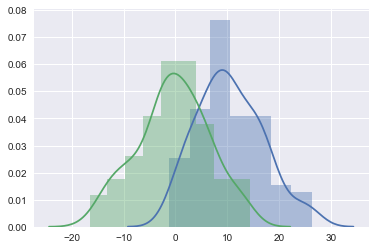

In [3]:
sns.distplot(n)
sns.distplot(n1)


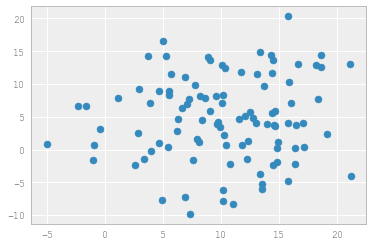

In [41]:
import matplotlib.pyplot as plt
plt.scatter(n,n1)

In [45]:
data = pd.DataFrame({'x':n, 'y':n1})
data.head()

,x,y
0,10.305772,12.406938
1,14.789053,0.295380
2,17.113353,0.397828
3,1.105203,7.791395
4,3.351582,-1.440839


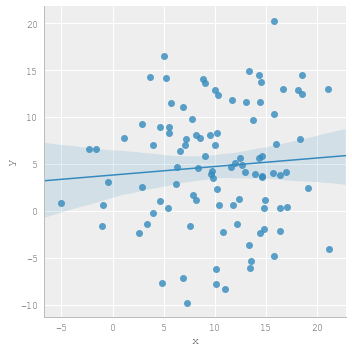

In [50]:
sns.lmplot('x', 'y', data)

In [69]:
y=12+72*n+ np.random.normal(0,500,100)

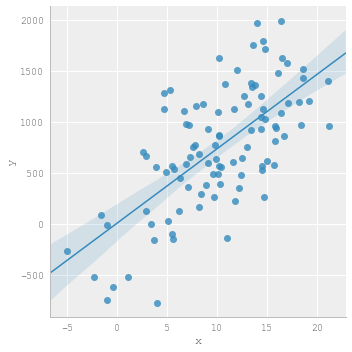

In [70]:
data = pd.DataFrame({'x':n, 'y':y})
sns.lmplot('x', 'y', data)

## Trabajo de programación con Carcinoma de Pulmón

Se importan las librerias necesarias para trabajar

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
sns.set()
%matplotlib inline

Se llama el archivo con los datos a trabajar, los cuales son una lista de genes normalizados asociados al cancer y un numero n de pacientes a los cuales se les hizo un analisis de expresion de estos genes mediante mRNAseq, por lo que para cada gen y persona se encuentra el número de reads correspondientes.

In [3]:
df= pd.read_table('C:/Users/Alex/Documents/eafit/semestres/X semestre/programacion/gdac/LUAD.txt', sep='\t')
pd.set_option('display.mpl_style', 'default') 

C:\Users\Alex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [6]:
df=df.convert_objects(convert_dates=True, convert_numeric=True) 
df=df.drop([0])

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [7]:
df.head()

,Hybridization REF,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,...,TCGA-NJ-A4YG-01A-22R-A262-07,TCGA-NJ-A4YI-01A-11R-A262-07,TCGA-NJ-A4YP-01A-11R-A262-07,TCGA-NJ-A4YQ-01A-11R-A262-07,TCGA-NJ-A55A-01A-11R-A262-07,TCGA-NJ-A55O-01A-11R-A262-07,TCGA-NJ-A55R-01A-11R-A262-07,TCGA-NJ-A7XG-01A-12R-A39D-07,TCGA-O1-A52J-01A-11R-A262-07,TCGA-S2-AA1A-01A-12R-A39D-07
1,?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,?|100133144,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,13.5406,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
3,?|100134869,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,16.0273,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
4,?|10357,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1809,57.0596,108.4155,...,163.5739,130.7486,101.7403,82.4231,100.4196,100.1867,74.7210,85.3715,61.1388,76.9265
5,?|10431,848.9397,924.0158,1140.6781,807.1729,562.0037,1342.6174,1148.3315,955.9141,844.5792,...,919.1686,403.4911,918.9533,995.6058,536.7602,873.9790,766.7448,677.7333,1137.3206,565.4335


C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


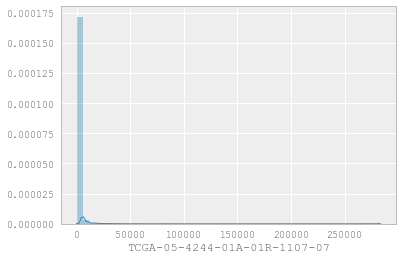

In [8]:
p1=df['TCGA-05-4244-01A-01R-1107-07']
p1[:5]
p1 = pd.to_numeric(p1)
type(p1)
sns.distplot(p1)

In [9]:
gen1=df[df['Hybridization REF']=='?|10431']
gen1=gen1.drop('Hybridization REF', 1)
#gen1=gen1.values.astype(float).tolist()


gen2=df[df['Hybridization REF']=='tAKR|389932']
gen2=gen2.drop('Hybridization REF', 1)
#gen2=gen2.values.astype(float).tolist()


C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


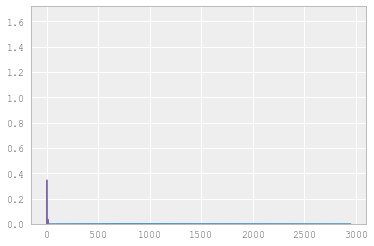

In [10]:
sns.distplot(gen1)
sns.distplot(gen2)

In [11]:
df2=df.ix[:,'TCGA-05-4244-01A-01R-1107-07':]
a=df2.max(axis=0)
#a.min

In [12]:
#df['TCGA-05-4244-01A-01R-1107-07'].value_counts()

Se seleccionan los genes que posean mas de cien mil reads

In [13]:
maximo=df.loc[df.ix[:,1] > 100000 ]
gen_list=maximo['Hybridization REF'].values.tolist()
gen_list
#maximo

['ACTB|60', 'CHI3L1|1116', 'EEF1A1|1915', 'SERPINA1|5265', 'SFTPB|6439']

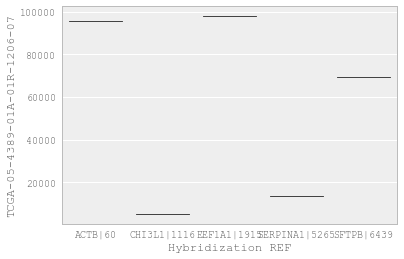

In [14]:
sns.boxplot(x="Hybridization REF", y= 'TCGA-05-4389-01A-01R-1206-07', data=maximo, palette="PRGn") #mirar cuantos pacientes presentan un gen mas expresado que otro

Se realiza un grafico de distribuciones de los 5 genes que fueron los que mas reads presentaron

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


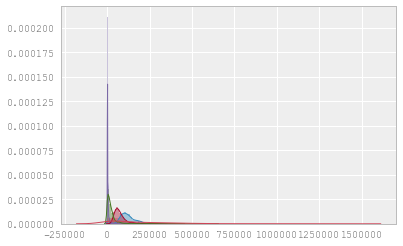

In [15]:
for i in range(len(gen_list)):
    name=gen_list[i]
    gen1=df[df['Hybridization REF']== name].ix[:,'TCGA-05-4244-01A-01R-1107-07':]
    sns.distplot(gen1)

In [16]:
genes=df.loc[df.ix[:,1] > 100000 ]

genes

,Hybridization REF,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,...,TCGA-NJ-A4YG-01A-22R-A262-07,TCGA-NJ-A4YI-01A-11R-A262-07,TCGA-NJ-A4YP-01A-11R-A262-07,TCGA-NJ-A4YQ-01A-11R-A262-07,TCGA-NJ-A55A-01A-11R-A262-07,TCGA-NJ-A55O-01A-11R-A262-07,TCGA-NJ-A55R-01A-11R-A262-07,TCGA-NJ-A7XG-01A-12R-A39D-07,TCGA-O1-A52J-01A-11R-A262-07,TCGA-S2-AA1A-01A-12R-A39D-07
231,ACTB|60,137303.7787,103524.5407,168009.2846,185012.2613,85773.9768,95672.8188,138900.8271,99652.6389,56764.9735,...,154276.5589,81374.9580,113281.5041,77682.9881,92195.9962,78692.5321,51586.7123,83239.8397,165549.7608,88652.5090
3694,CHI3L1|1116,108045.7282,2968.4410,2019.0666,4982.3124,2357.3610,5290.2685,1028.8999,231.3951,3510.9932,...,5575.6351,1428.6673,13299.2886,2881.9837,1135.5888,2799.8833,4674.2356,4282.0836,2331.1005,2284.0108
5381,EEF1A1|1915,148316.6070,159088.4761,86316.5050,66471.5141,75301.1607,97808.7248,59186.3324,144792.4021,45594.3897,...,93904.7344,44370.5942,62271.0874,43602.0088,61743.1594,89722.2870,33416.4714,117601.3738,33799.0431,83202.5946
15793,SERPINA1|5265,146666.8994,3062.1304,29799.5524,5356.8234,22850.3360,13523.4899,728.0856,27178.4561,11376.0425,...,23706.6975,10587.4455,5809.4512,5576.8989,6636.9438,10765.4609,25996.0353,71603.8924,34558.8517,4753.4418
15899,SFTPB|6439,283432.7603,112463.0253,31106.3583,203.8871,415841.4722,69450.3356,281563.4744,2273.1482,391124.3366,...,441413.3949,395628.7345,198874.7434,23124.2938,139927.4412,280745.0758,233308.1036,983538.8666,715603.8278,26194.7077


,Hybridization REF,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,...,TCGA-NJ-A4YG-01A-22R-A262-07,TCGA-NJ-A4YI-01A-11R-A262-07,TCGA-NJ-A4YP-01A-11R-A262-07,TCGA-NJ-A4YQ-01A-11R-A262-07,TCGA-NJ-A55A-01A-11R-A262-07,TCGA-NJ-A55O-01A-11R-A262-07,TCGA-NJ-A55R-01A-11R-A262-07,TCGA-NJ-A7XG-01A-12R-A39D-07,TCGA-O1-A52J-01A-11R-A262-07,TCGA-S2-AA1A-01A-12R-A39D-07
231,ACTB|60,137303.7787,103524.5407,168009.2846,185012.2613,85773.9768,95672.8188,138900.8271,99652.6389,56764.9735,...,154276.5589,81374.9580,113281.5041,77682.9881,92195.9962,78692.5321,51586.7123,83239.8397,165549.7608,88652.5090
3694,CHI3L1|1116,108045.7282,2968.4410,2019.0666,4982.3124,2357.3610,5290.2685,1028.8999,231.3951,3510.9932,...,5575.6351,1428.6673,13299.2886,2881.9837,1135.5888,2799.8833,4674.2356,4282.0836,2331.1005,2284.0108
5381,EEF1A1|1915,148316.6070,159088.4761,86316.5050,66471.5141,75301.1607,97808.7248,59186.3324,144792.4021,45594.3897,...,93904.7344,44370.5942,62271.0874,43602.0088,61743.1594,89722.2870,33416.4714,117601.3738,33799.0431,83202.5946
15793,SERPINA1|5265,146666.8994,3062.1304,29799.5524,5356.8234,22850.3360,13523.4899,728.0856,27178.4561,11376.0425,...,23706.6975,10587.4455,5809.4512,5576.8989,6636.9438,10765.4609,25996.0353,71603.8924,34558.8517,4753.4418
15899,SFTPB|6439,283432.7603,112463.0253,31106.3583,203.8871,415841.4722,69450.3356,281563.4744,2273.1482,391124.3366,...,441413.3949,395628.7345,198874.7434,23124.2938,139927.4412,280745.0758,233308.1036,983538.8666,715603.8278,26194.7077


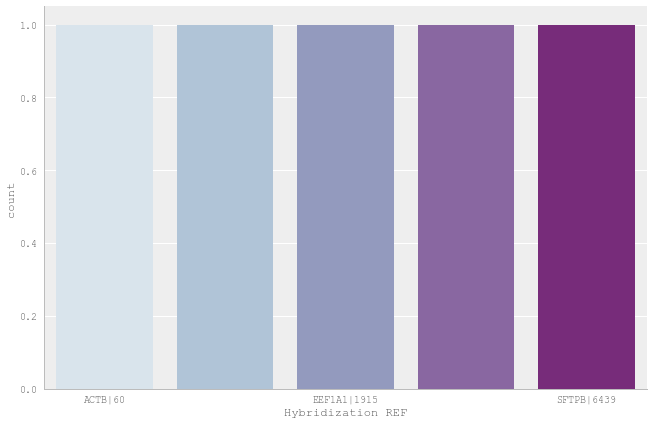

In [17]:
g = sns.factorplot(x='Hybridization REF', data=genes, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)
genes

In [ ]:
maximo = maximo.set_index('Hybridization REF')

In [22]:
maximo1 = maximo.transpose()
maximo1.head()

Hybridization REF,ACTB|60,CHI3L1|1116,EEF1A1|1915,SERPINA1|5265,SFTPB|6439
TCGA-05-4244-01A-01R-1107-07,137303.7787,108045.7282,148316.6070,146666.8994,283432.7603
TCGA-05-4249-01A-01R-1107-07,103524.5407,2968.4410,159088.4761,3062.1304,112463.0253
TCGA-05-4250-01A-01R-1107-07,168009.2846,2019.0666,86316.5050,29799.5524,31106.3583
TCGA-05-4382-01A-01R-1206-07,185012.2613,4982.3124,66471.5141,5356.8234,203.8871
TCGA-05-4384-01A-01R-1755-07,85773.9768,2357.3610,75301.1607,22850.3360,415841.4722


C:\Users\Alex\Anaconda3\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


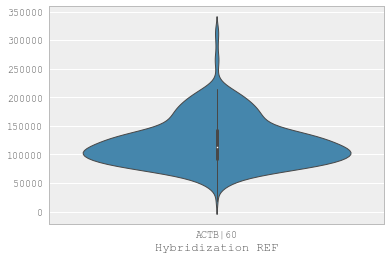

In [34]:
sns.violinplot(maximo1[['ACTB|60']])

array([[  1.03524541e+05,   2.96844100e+03,   1.59088476e+05,
          3.06213040e+03,   1.12463025e+05],
       [  1.68009285e+05,   2.01906660e+03,   8.63165050e+04,
          2.97995524e+04,   3.11063583e+04],
       [  1.85012261e+05,   4.98231240e+03,   6.64715141e+04,
          5.35682340e+03,   2.03887100e+02],
       ..., 
       [  8.32398397e+04,   4.28208360e+03,   1.17601374e+05,
          7.16038924e+04,   9.83538867e+05],
       [  1.65549761e+05,   2.33110050e+03,   3.37990431e+04,
          3.45588517e+04,   7.15603828e+05],
       [  8.86525090e+04,   2.28401080e+03,   8.32025946e+04,
          4.75344180e+03,   2.61947077e+04]])

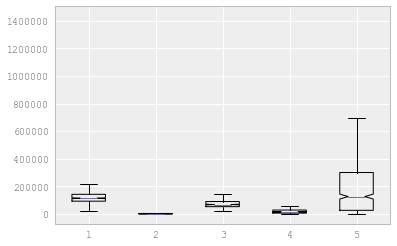

In [25]:
import matplotlib.pyplot as plt
maximo1=maximo.transpose()
gen_list=maximo1.ix[1:].as_matrix()
plt.boxplot(gen_list,1)
gen_list

In [108]:
print(maximo.mean(1))
print (maximo.std(1))


231      121826.814793
3694       4139.580485
5381      79781.542845
15793     24569.435364
15899    208623.105630
dtype: float64
231       41716.007153
3694      12214.624242
5381      47042.834629
15793     44095.846713
15899    244657.699131
dtype: float64


{'boxes': [<matplotlib.lines.Line2D at 0x231e61d3278>],
 'caps': [<matplotlib.lines.Line2D at 0x231e61ec0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x231e6baeeb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x231e8689e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x231e61d3e80>,
  <matplotlib.lines.Line2D at 0x231e61ec7f0>]}

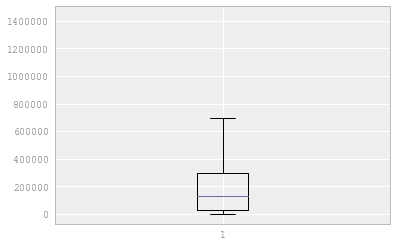

In [136]:
gen2=df[df['Hybridization REF']=='SFTPB|6439']
gen2=gen2.drop('Hybridization REF',1)
gen2=gen2.values.tolist()
plt.boxplot(gen2)

